In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform = transforms.Compose([transforms.Lambda(lambda image: image.convert('RGB')),transforms.ToTensor()])


train_dataM = datasets.MNIST(root='../Desktop', train=True, download=True, transform=transform)

test_dataM = datasets.MNIST(root='../Desktop', train=False, download=True, transform=transform)

In [3]:
transformC = transforms.Compose([transforms.Resize([28,28],interpolation=2),transforms.ToTensor()])

train_dataC = datasets.CIFAR10(root='../Desktop', train=True, download=True, transform=transformC)
test_dataC = datasets.CIFAR10(root='../Desktop', train=False, download=True, transform=transformC)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
train_dataM.targets[train_dataM.targets == 0] = 10 
train_dataM.targets[train_dataM.targets == 1] = 11
train_dataM.targets[train_dataM.targets == 2] = 12
train_dataM.targets[train_dataM.targets == 3] = 13
train_dataM.targets[train_dataM.targets == 4] = 14
train_dataM.targets[train_dataM.targets == 5] = 15
train_dataM.targets[train_dataM.targets == 6] = 16
train_dataM.targets[train_dataM.targets == 7] = 17
train_dataM.targets[train_dataM.targets == 8] = 18
train_dataM.targets[train_dataM.targets == 9] = 19
print(train_dataM.targets.unique())

tensor([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])


In [5]:
test_dataM.targets[test_dataM.targets == 0] = 10 
test_dataM.targets[test_dataM.targets == 1] = 11
test_dataM.targets[test_dataM.targets == 2] = 12
test_dataM.targets[test_dataM.targets == 3] = 13
test_dataM.targets[test_dataM.targets == 4] = 14
test_dataM.targets[test_dataM.targets == 5] = 15
test_dataM.targets[test_dataM.targets == 6] = 16
test_dataM.targets[test_dataM.targets == 7] = 17
test_dataM.targets[test_dataM.targets == 8] = 18
test_dataM.targets[test_dataM.targets == 9] = 19
print(test_dataM.targets.unique())

tensor([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])


In [6]:
train_dataM.train_labels

/Users/freddiebermingham/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([15, 10, 14,  ..., 15, 16, 18])

In [7]:
train_dataM.classes = train_dataM.targets

In [8]:
train_data = torch.utils.data.ConcatDataset([train_dataC, train_dataM])

In [9]:
test_data = torch.utils.data.ConcatDataset([test_dataC, test_dataM])

In [10]:
train_data.datasets

[Dataset CIFAR10
     Number of datapoints: 50000
     Root location: ../Desktop
     Split: Train
     StandardTransform
 Transform: Compose(
                Resize(size=[28, 28], interpolation=PIL.Image.BILINEAR)
                ToTensor()
            ),
 Dataset MNIST
     Number of datapoints: 60000
     Root location: ../Desktop
     Split: Train
     StandardTransform
 Transform: Compose(
                Lambda()
                ToTensor()
            )]

In [11]:
test_data.datasets

[Dataset CIFAR10
     Number of datapoints: 10000
     Root location: ../Desktop
     Split: Test
     StandardTransform
 Transform: Compose(
                Resize(size=[28, 28], interpolation=PIL.Image.BILINEAR)
                ToTensor()
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ../Desktop
     Split: Test
     StandardTransform
 Transform: Compose(
                Lambda()
                ToTensor()
            )]

In [12]:
torch.manual_seed(101)  

train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [13]:
class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck','zero','one','two','three','four','five','six','seven','eight','nine']

Label: [   17     4     4    15    16     5     5     4     4     3]
Class:  seven  deer  deer five six   dog   dog  deer  deer   cat


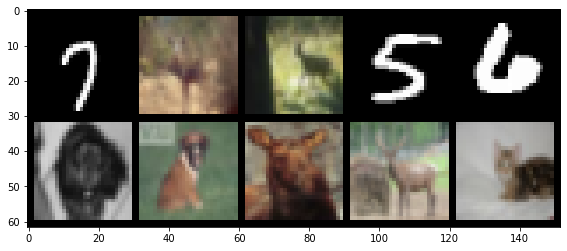

In [14]:
np.set_printoptions(formatter=dict(int=lambda x: f'{x:5}'))

for images,labels in train_loader: 
    break

print('Label:', labels.numpy())
print('Class: ', *np.array([class_names[i] for i in labels]))


im = make_grid(images, nrow=5) 
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [15]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 12, 3, 1)
        self.conv2 = nn.Conv2d(12, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 120)   
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84, 20)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [16]:
torch.manual_seed(101)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(12, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=20, bias=True)
)

In [17]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

In [18]:
count_parameters(model)

   324
    12
  1728
    16
 48000
   120
 10080
    84
  1680
    20
______
 62064


In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [20]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # results
        if b%1000 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/50000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            
            y_val = model(X_test)

            # Tally number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') 

epoch:  0  batch: 1000 [ 10000/50000]  loss: 0.71301407  accuracy:  54.010%
epoch:  0  batch: 2000 [ 20000/50000]  loss: 1.70383573  accuracy:  59.755%
epoch:  0  batch: 3000 [ 30000/50000]  loss: 1.22950685  accuracy:  62.613%
epoch:  0  batch: 4000 [ 40000/50000]  loss: 0.80729520  accuracy:  64.552%
epoch:  0  batch: 5000 [ 50000/50000]  loss: 0.90131617  accuracy:  65.918%
epoch:  0  batch: 6000 [ 60000/50000]  loss: 0.95348299  accuracy:  67.108%
epoch:  0  batch: 7000 [ 70000/50000]  loss: 0.20453377  accuracy:  68.016%
epoch:  0  batch: 8000 [ 80000/50000]  loss: 0.05316257  accuracy:  68.730%
epoch:  0  batch: 9000 [ 90000/50000]  loss: 0.82005757  accuracy:  69.257%
epoch:  0  batch: 10000 [100000/50000]  loss: 0.27438265  accuracy:  69.807%
epoch:  0  batch: 11000 [110000/50000]  loss: 0.99627149  accuracy:  70.315%
epoch:  1  batch: 1000 [ 10000/50000]  loss: 0.30582508  accuracy:  75.840%
epoch:  1  batch: 2000 [ 20000/50000]  loss: 1.91716075  accuracy:  76.145%
epoch:  1 

epoch:  9  batch: 10000 [100000/50000]  loss: 0.42180958  accuracy:  84.357%
epoch:  9  batch: 11000 [110000/50000]  loss: 0.73804176  accuracy:  84.324%

Duration: 1073 seconds


In [21]:
print(test_correct)
print()
print(f'Test accuracy: {test_correct[-1].item()*100/20000:.3f}%')

[tensor(14596), tensor(15300), tensor(15658), tensor(15741), tensor(15766), tensor(15709), tensor(16011), tensor(15790), tensor(15853), tensor(16017)]

Test accuracy: 80.085%
